### Gizem Yıldırım

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.svm import SVC
from xgboost import XGBClassifier as xgb 
from sklearn.metrics import accuracy_score

In [2]:
plt.style.use('ggplot')
np.random.seed(42)

# PART 1

#### Create arrays with different properties

In [3]:
arr_1 = np.random.normal((16, 12), (2, 3), (100, 2))
arr_2 = np.random.normal((2, 3), (3, 2), (100, 2))
arr_3 = np.random.normal((5, 15), (2, 2), (100, 2))

#### Visualize arrays

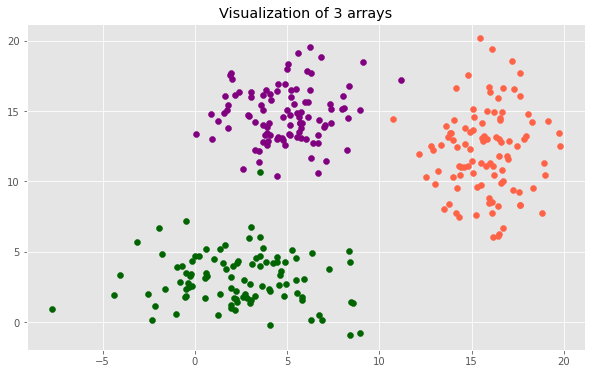

In [4]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(arr_1[:, 0], arr_1[:, 1], c='tomato')
plt.scatter(arr_2[:, 0], arr_2[:, 1], c='darkgreen')
plt.scatter(arr_3[:, 0], arr_3[:, 1], c='purple')
plt.title("Visualization of 3 arrays")
plt.show()

#### Creating a dataset containing all arrays and adding labels

In [5]:
_arr1 = np.hstack([arr_1, np.zeros((len(arr_1),1))])
_arr2 = np.hstack([arr_2, np.ones((len(arr_2),1))])
_arr3 = np.hstack([arr_3, np.full((len(arr_2),1),2)])

dataset = np.vstack([_arr1, _arr2, _arr3])
print(dataset.shape)

(300, 3)


#### Train test split and visualization

In [6]:
X_train, X_test, y_train, y_test = (
    tts(dataset[:,:2], dataset[:,2], test_size=0.3, random_state=42)
)
X_train.shape, X_test.shape 

((210, 2), (90, 2))

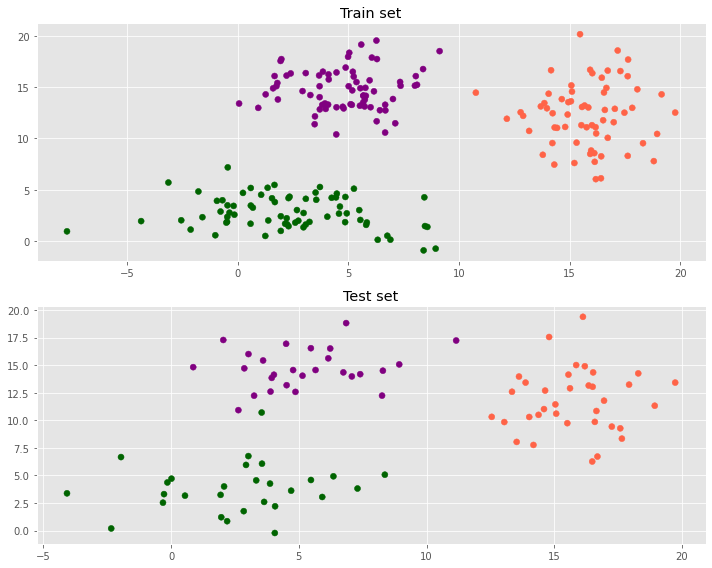

In [7]:
colors_train= ['tomato' if l == 0 else ('darkgreen' if l==1 else 'purple') for l in y_train]
colors_test= ['tomato' if l == 0 else ('darkgreen' if l==1 else 'purple') for l in y_test]
fig, ax = plt.subplots(2,1,figsize=(10,8))
ax[0].scatter(X_train[:, 0], X_train[:, 1], c=colors_train)
ax[0].set_title('Train set')

ax[1].scatter(X_test[:, 0], X_test[:, 1], c=colors_test)
ax[1].set_title('Test set')
plt.tight_layout()

#### Fitting Logistic Regression

In [8]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

train_pred = lr_model.predict(X_train)
test_pred = lr_model.predict(X_test)

In [9]:
accuracy_train = accuracy_score(y_train,train_pred)
accuracy_test = accuracy_score(y_test,test_pred)
print("Train accuracy is:", round(accuracy_train,3))
print("Test accuracy is:", round(accuracy_test,3))

Train accuracy is: 1.0
Test accuracy is: 0.978


#### Visualizing decision boundaries of Logistic Regression

In [10]:
N_POINTS_PER_AXIS = 500

_x = np.linspace(-25, 25, N_POINTS_PER_AXIS)
_y = np.linspace(-25, 25, N_POINTS_PER_AXIS)

_xv, _yv = np.meshgrid(_x, _y)

_xv.shape, _yv.shape

X_meshgrid = np.hstack([_xv.reshape(-1, 1), _yv.reshape(-1, 1)])
X_meshgrid.shape

(250000, 2)

In [12]:
probs_lr = lr_model.predict_proba(X_meshgrid)

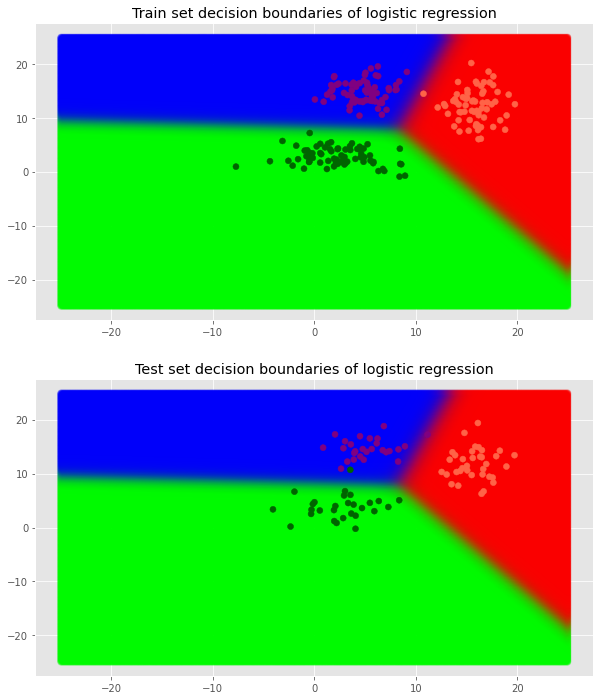

In [13]:
fig, ax = plt.subplots(2,1,figsize=(10, 12))
ax[0].scatter(X_meshgrid[:, 0], X_meshgrid[:, 1], cmap="RdBu", c=probs_lr, alpha=0.2)
ax[0].scatter(X_train[:, 0], X_train[:, 1],c=colors_train)
ax[0].set_title('Train set decision boundaries of logistic regression')

ax[1].scatter(X_meshgrid[:, 0], X_meshgrid[:, 1], cmap="RdBu", c=probs_lr, alpha=0.2)
ax[1].scatter(X_test[:, 0], X_test[:, 1],c=colors_test)
ax[1].set_title('Test set decision boundaries of logistic regression')
plt.show()

#### Fitting Decision Tree

In [14]:
desicion_tree = DecisionTreeClassifier(random_state=0)
desicion_tree.fit(X_train, y_train)

train_pred_dt = desicion_tree.predict(X_train)
test_pred_dt = desicion_tree.predict(X_test)

accuracy_train_dt = accuracy_score(y_train,train_pred_dt)
accuracy_test_dt = accuracy_score(y_test,test_pred_dt)
print("Train accuracy is:", round(accuracy_train_dt,3))
print("Test accuracy is:", round(accuracy_test_dt,3))

Train accuracy is: 1.0
Test accuracy is: 0.944


#### Visualizing decision boundaries of Decision Tree

In [15]:
probs_dt = desicion_tree.predict_proba(X_meshgrid)
probs_dt

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

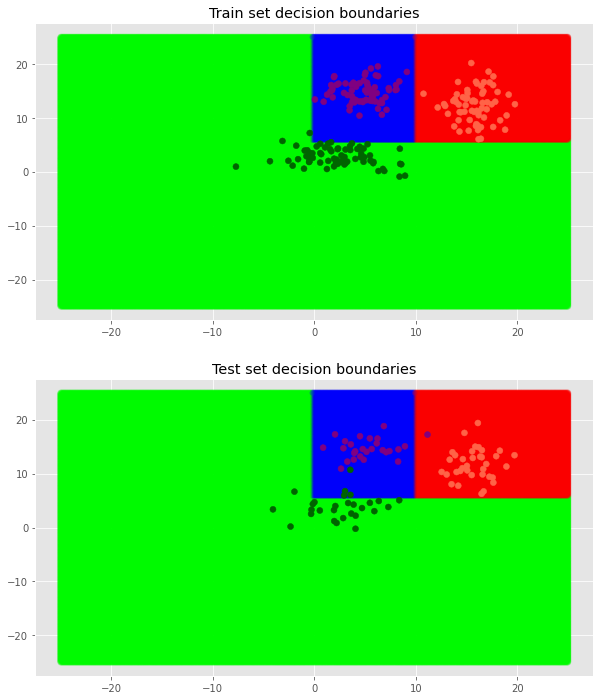

In [17]:
fig, ax = plt.subplots(2,1,figsize=(10, 12))
ax[0].scatter(X_meshgrid[:, 0], X_meshgrid[:, 1], cmap="RdBu", c=probs_dt, alpha=0.2)
ax[0].scatter(X_train[:, 0], X_train[:, 1],c=colors_train)
ax[0].set_title('Train set decision boundaries')

ax[1].scatter(X_meshgrid[:, 0], X_meshgrid[:, 1], cmap="RdBu", c=probs_dt, alpha=0.2)
ax[1].scatter(X_test[:, 0], X_test[:, 1],c=colors_test)
ax[1].set_title('Test set decision boundaries')
plt.show()

#### Overfitting an SVM classifier with RBF

In [21]:
svc = SVC(kernel='rbf', gamma=10, probability=True, random_state=42)
svc.fit(X_train, y_train)
train_pred_svc = svc.predict(X_train)
test_pred_svc = svc.predict(X_test)

accuracy_train_svc = accuracy_score(y_train,train_pred_svc)
accuracy_test_svc = accuracy_score(y_test,test_pred_svc)
print("Train accuracy is:", round(accuracy_train_svc,2))
print("Test accuracy is:", round(accuracy_test_svc,2))

probs_svc = svc.predict_proba(X_meshgrid)

Train accuracy is: 1.0
Test accuracy is: 0.79


#### Visualizing overfit SVM decision boundaries

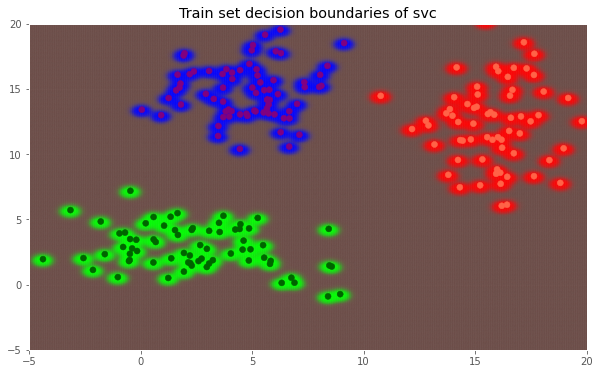

In [22]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(X_meshgrid[:, 0], X_meshgrid[:, 1],  c=probs_svc, cmap='RdBu', alpha=0.2)
plt.xlim(-5,20)
plt.ylim(-5,20)
plt.scatter(X_train[:, 0], X_train[:, 1],c=colors_train)
plt.title('Train set decision boundaries of svc')
plt.show()

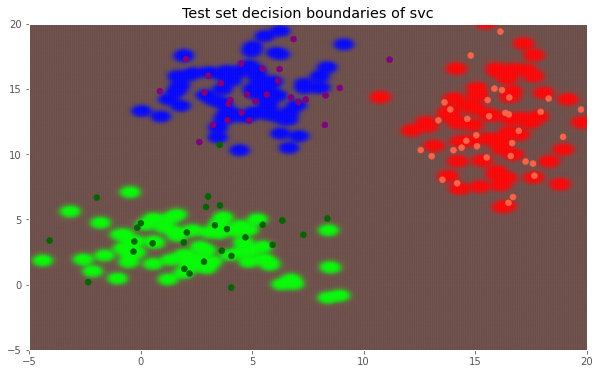

In [23]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(X_meshgrid[:, 0], X_meshgrid[:, 1],  c=probs_svc, cmap='RdBu', alpha=0.2)
plt.xlim(-5,20)
plt.ylim(-5,20)
plt.scatter(X_test[:, 0], X_test[:, 1],c=colors_test)
plt.title('Test set decision boundaries of svc')
plt.show()

# PART 2

#### Create arrays with different properties

In [33]:
arr_1 = np.random.normal((0, 0), (0.5, 0.5), (100, 2))

x_values_2 = np.linspace(-3, 3, 100)
y_values_2 = x_values_2 ** 2 - 4 + np.random.normal(0, 0.5, 100)
arr_2 = np.vstack([x_values_2, y_values_2]).T

y_values_3 = y_values_2-4
arr_3 = np.vstack([x_values_2, y_values_3]).T

#### Visualizing arrays

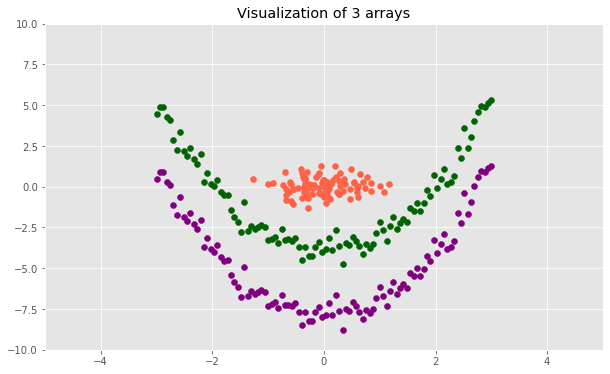

In [34]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(arr_1[:, 0], arr_1[:, 1], c='tomato')
plt.scatter(arr_2[:, 0], arr_2[:, 1], c='darkgreen')
plt.scatter(arr_3[:, 0], arr_3[:, 1], c='purple')
plt.xlim(-5,5)
plt.ylim(-10,10)
plt.title("Visualization of 3 arrays")
plt.show()

#### Creating a dataset containing all arrays and adding labels

In [35]:
_arr1 = np.hstack([arr_1, np.zeros((len(arr_1),1))])
_arr2 = np.hstack([arr_2, np.ones((len(arr_2),1))])
_arr3 = np.hstack([arr_3, np.full((len(arr_2),1),2)])

dataset_2 = np.vstack([_arr1, _arr2, _arr3])
print(dataset.shape)

X_train, X_test, y_train, y_test = (
    tts(dataset_2[:,:2], dataset_2[:,2], test_size=0.3, random_state=42)
)

(300, 3)


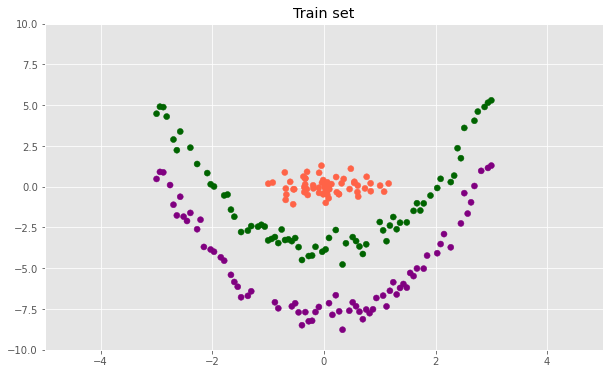

<Figure size 432x288 with 0 Axes>

In [38]:
colors_train= ['tomato' if l == 0 else ('darkgreen' if l==1 else 'purple') for l in y_train]
fig = plt.figure(figsize=(10,6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=colors_train)
plt.title('Train set')

plt.xlim(-5,5)
plt.ylim(-10,10)

plt.show()
plt.tight_layout()

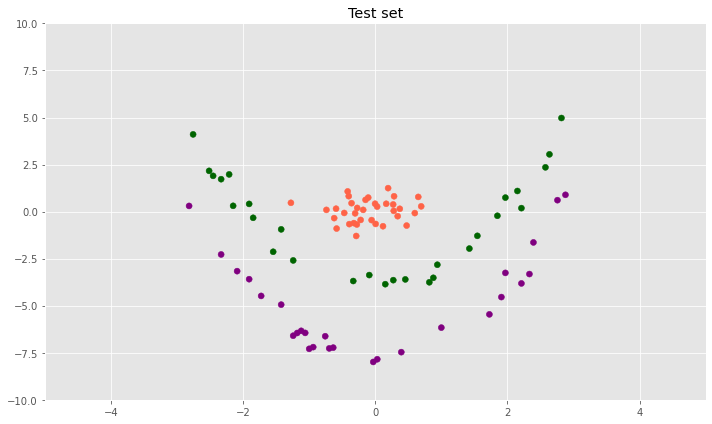

In [39]:
colors_test= ['tomato' if l == 0 else ('darkgreen' if l==1 else 'purple') for l in y_test]
fig = plt.figure(figsize=(10,6))

plt.scatter(X_test[:, 0], X_test[:, 1], c=colors_test)
plt.title('Test set')

plt.xlim(-5,5)
plt.ylim(-10,10)

plt.tight_layout()

#### Fitting Logistic Regression, visualizing its decision boundaries to investigate its performance

In [46]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

train_pred = lr_model.predict(X_train)
test_pred = lr_model.predict(X_test)

In [47]:
accuracy_train = accuracy_score(y_train,train_pred)
accuracy_test = accuracy_score(y_test,test_pred)
print("Train accuracy is:", round(accuracy_train,2))
print("Test accuracy is:", round(accuracy_test,2))

Train accuracy is: 0.5
Test accuracy is: 0.52


In [48]:
probs_lr_p2 = lr_model.predict_proba(X_meshgrid)

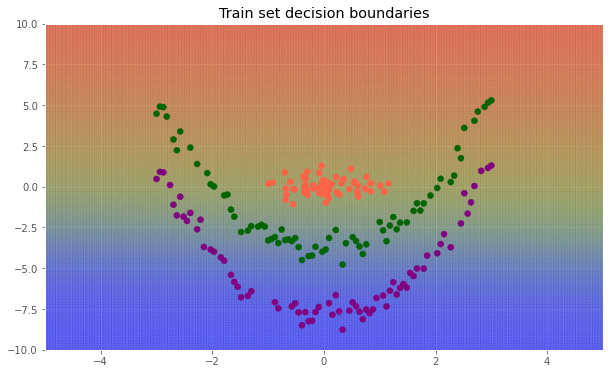

In [49]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(X_meshgrid[:, 0], X_meshgrid[:, 1], cmap="RdBu", c=probs_lr_p2, alpha=0.2)
plt.scatter(X_train[:, 0], X_train[:, 1],c=colors_train)
plt.title('Train set decision boundaries')

plt.xlim(-5,5)
plt.ylim(-10,10)
plt.show()

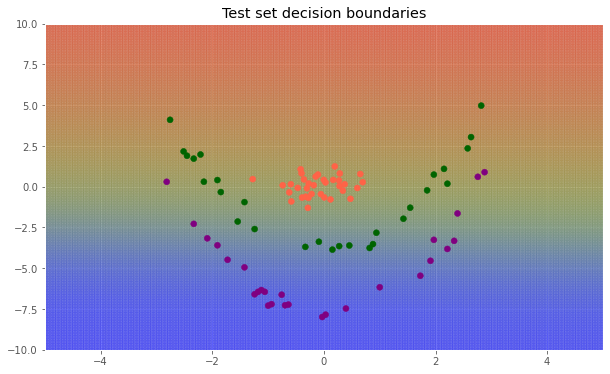

In [50]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(X_meshgrid[:, 0], X_meshgrid[:, 1], cmap="RdBu", c=probs_lr_p2, alpha=0.2)
plt.scatter(X_test[:, 0], X_test[:, 1],c=colors_test)
plt.title('Test set decision boundaries')

plt.xlim(-5,5)
plt.ylim(-10,10)
plt.show()

#### Fitting Random Forest Classifier visualizing its decision boundaries to investigate its performance

In [51]:
rfc_model = (
    rfc(max_depth=3, 
        min_samples_split=20, 
        min_samples_leaf=1,
        random_state=6)
)
rfc_model.fit(X_train, y_train)

train_pred_rfc = rfc_model.predict(X_train)
test_pred_rfc = rfc_model.predict(X_test)

accuracy_train_rfc = accuracy_score(y_train,train_pred_rfc)
accuracy_test_rfc = accuracy_score(y_test,test_pred_rfc)
print("Train accuracy is:", round(accuracy_train_rfc,2))
print("Test accuracy is:", round(accuracy_test_rfc,2))

Train accuracy is: 0.92
Test accuracy is: 0.91


In [52]:
probs_rfc = rfc_model.predict_proba(X_meshgrid)
probs_rfc

array([[1.92307692e-04, 7.79154915e-02, 9.21892201e-01],
       [1.92307692e-04, 7.79154915e-02, 9.21892201e-01],
       [1.92307692e-04, 7.79154915e-02, 9.21892201e-01],
       ...,
       [1.19893115e-01, 6.61543692e-01, 2.18563193e-01],
       [1.19893115e-01, 6.61543692e-01, 2.18563193e-01],
       [1.19893115e-01, 6.61543692e-01, 2.18563193e-01]])

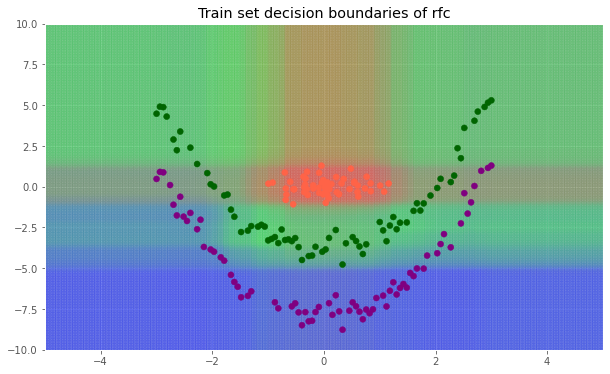

In [53]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(X_meshgrid[:, 0], X_meshgrid[:, 1], cmap="RdBu", c=probs_rfc, alpha=0.2)
plt.scatter(X_train[:, 0], X_train[:, 1],c=colors_train)
plt.title('Train set decision boundaries of rfc')

plt.xlim(-5,5)
plt.ylim(-10,10)
plt.show()

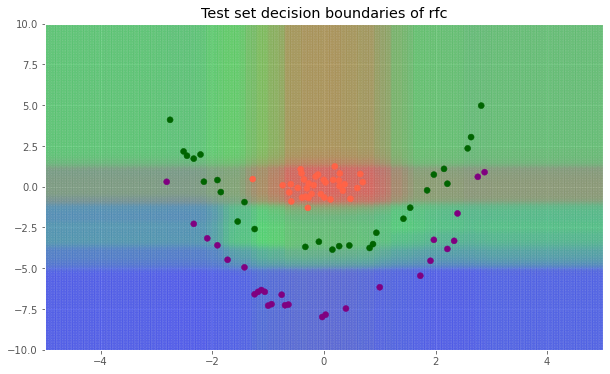

In [54]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(X_meshgrid[:, 0], X_meshgrid[:, 1], cmap="RdBu", c=probs_rfc, alpha=0.2)
plt.scatter(X_test[:, 0], X_test[:, 1],c=colors_test)
plt.title('Test set decision boundaries of rfc')

plt.xlim(-5,5)
plt.ylim(-10,10)
plt.show()

#### Overfitting SVM, visualizing its decision boundaries to investigate its performance

In [115]:
overfit_model = (
    SVC(kernel='rbf', gamma=100, probability=True, random_state=42)
)
overfit_model.fit(X_train, y_train)

train_pred_overfit = overfit_model.predict(X_train)
test_pred_overfit = overfit_model.predict(X_test)

accuracy_train_overfit = accuracy_score(y_train,train_pred_overfit)
accuracy_test_overfit = accuracy_score(y_test,test_pred_overfit)
print("Train accuracy is:", round(accuracy_train_overfit,5))
print("Test accuracy is:", round(accuracy_test_overfit,5))

Train accuracy is: 1.0
Test accuracy is: 0.55556


In [116]:
probs_overfit = overfit_model.predict_proba(X_meshgrid)
probs_overfit

array([[0.1897584 , 0.39762858, 0.41261302],
       [0.1897584 , 0.39762858, 0.41261302],
       [0.1897584 , 0.39762858, 0.41261302],
       ...,
       [0.1897584 , 0.39762858, 0.41261302],
       [0.1897584 , 0.39762858, 0.41261302],
       [0.1897584 , 0.39762858, 0.41261302]])

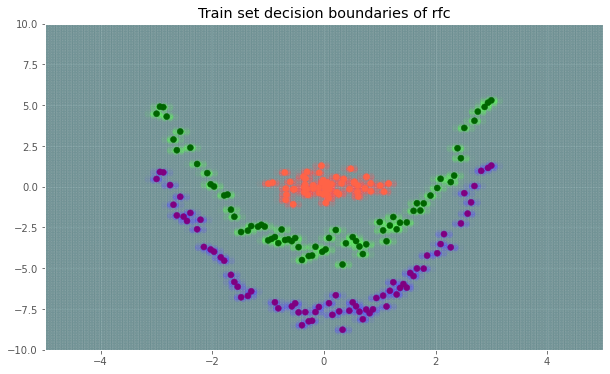

In [117]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(X_meshgrid[:, 0], X_meshgrid[:, 1], cmap="RdBu", c=probs_overfit, alpha=0.2)
plt.scatter(X_train[:, 0], X_train[:, 1],c=colors_train)
plt.title('Train set decision boundaries of rfc')

plt.xlim(-5,5)
plt.ylim(-10,10)
plt.show()

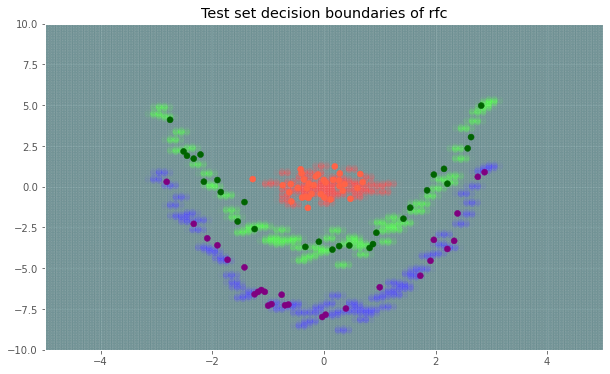

In [118]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(X_meshgrid[:, 0], X_meshgrid[:, 1], cmap="RdBu", c=probs_overfit, alpha=0.2)
plt.scatter(X_test[:, 0], X_test[:, 1],c=colors_test)
plt.title('Test set decision boundaries of rfc')

plt.xlim(-5,5)
plt.ylim(-10,10)
plt.show()